In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as st

%matplotlib inline

# Distribution of Sample variance
If you are using numpy then do remember to use ddof=1 while computing sample variance/sample standard deviation. 

Sample variance $s^2$ = $  \frac {\sum(x-\bar{x})^2} {n-1} $

A test statistic defined as $T$ follows $\chi^2$ distribution  , $T$ = $ \frac {s^2 * (n-1)} {\sigma^2} \sim \chi^2_{n-1}$ where $n$ is sample size and $n-1$ is degree of freedom , $s^2$ is the sample variance and $\sigma^2 $ is the population variance

Degree of freedom =  49
48.953434756012534
41.150106170270874


C:\Users\abc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


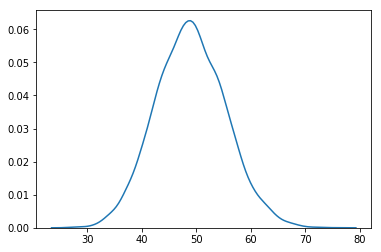

In [2]:
# Calculating sample standard deviation
a= 4
b= 8
sample_size = 50
chi_statistic= []

for iter in range(10000):
    
    x_rand = np.random.uniform(low= a, high= b, size = sample_size)

    n= len(x_rand)

    xp = x_rand - np.mean(x_rand)

    deviation_square = [ g**2 for g in xp ]

    std_1 = np.sqrt ( sum( deviation_square )  /  ( n -1 )   )

    # it is important to use ddof=1 since we are computing standard deviation of sample
    x_std = np.std(x_rand,ddof=1 )

    #print(x_std)
    #print(std_1)

    num= std_1**2  * (n-1) 
    den = ( (a-b)**2 ) /12

    chi_inter = num / den
    chi_statistic.append( chi_inter  )

# plotting the histogram    
sns.distplot(chi_statistic, hist= False)

# mean of chi-square distribution is equal to degree of freedom
print('Degree of freedom = ', n-1 )
print (np.mean(chi_statistic)  )

#DOUBT.... variance should be equal to 2*dof.. but that is not happening
print (np.var(chi_statistic, ddof=1)  )



# Confidence interval and Hypothesis Testing

In [4]:
import scipy.stats as st

conf_inter = st.norm.interval( alpha= 0.05, loc= 0, scale = 1 )

lower = conf_inter[0]
upper = conf_inter[1]

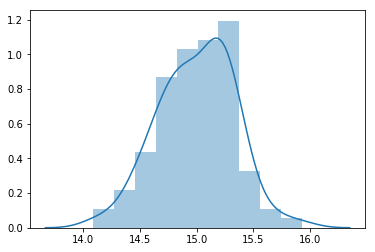

In [5]:
#size of each random sample drawn from population
rand_sample_size = 100

#number of samples to be drawn from the population
number_of_samples = 100

#parameters for a uniform distribution
a=10
b=20


#finding population mean from which sample is drawn
pop_mu = (a+b)/2
pop_var =  ( (a-b)**2 ) / 12 
pop_std = np.sqrt( pop_var  )

# a list containing value sample means obtained by doing several iterations (or taking numerous samples)
sample_mean_list = []


for iter in range( number_of_samples ) :
    
    
    x_uni = np.random.uniform(a , b , rand_sample_size )
    
    samp_mean_value = np.mean( x_uni ) 
    
    # constructing a 95% confidence interval
    conf_lower = samp_mean_value - (2* pop_std)/np.sqrt(n) 
    conf_upper = samp_mean_value + (2* pop_std)/np.sqrt(n) 
    
    
    sample_mean_list.append(   samp_mean_value  )
    
    
    
# sample mean properties
sampling_distri_mu = np.mean( sample_mean_list)
sampling_distri_var = np.var( sample_mean_list )

    
#plotting sampling distribution of sample mean
sns.distplot(sample_mean_list)    
    

## t-statistic : Finding confidence interval for population mean using t statistic

In [6]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
import scipy.stats as st

[(-20, 20)]

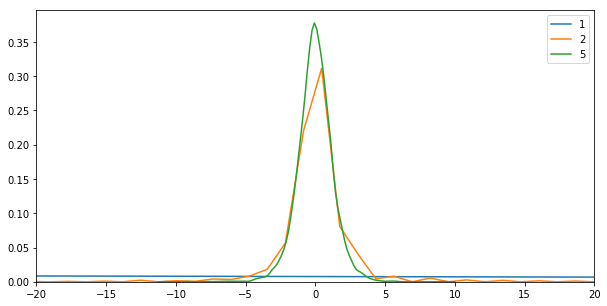

In [8]:
dof_series = [ 1,2,5]

t_stat =  st.t.rvs(10,size = 5000)

plt.figure(figsize= ( 10,5))


for x in dof_series:
    
    t_stat =  st.t.rvs(x ,size = 5000)
    
    ax = sns.distplot(t_stat, hist= False, label = x)

ax.set( xlim=(-20,20) )    

In [9]:
#finding critical value for t-distribution
st.t.ppf(0.9,10)

1.3721836411102863

In [10]:
# Calculating sample standard deviation
x_rand = [1,2,3,454, 66767676]
xp = x_rand - np.mean(x_rand)

deviation_square = [ g**2 for g in xp ]

print(deviation_square)

print( sum( deviation_square )  )

std_1 = np.sqrt ( sum( deviation_square )  /  ( len(x_rand) -1 )   )

# it is important to use ddof=1 since we are computing standard deviation of sample
x_std = np.std(x_rand,ddof=1 )

print(x_std)
print(std_1)


[178319332689326.4, 178319305982075.03, 178319279274825.62, 178307234509198.22, 2853060609208781.0]
3566325761664206.0
29859361.01821423
29859361.01821423


In [11]:
# constructing confidence intervial for the population mean using t-statistic

x_rand = np.random.uniform(low= 4, high= 10, size = 10)

x_bar = np.mean(x_rand)

x_std = np.std(x_rand,ddof = 1)

# creating ab% confidence interval
conf= [0.90,0.95,0.99]


for abn in conf:
      
    upper = x_bar + st.t.ppf(df=10, q= abn)
    lower = x_bar - st.t.ppf(df=10, q= abn)

    confi_interval = (lower, upper)
    length_conf = upper- lower
    
    print('For confidence level =', abn*100 ,'%, ', 'confidence interval = ' , confi_interval )
    print('Length of confidence interval = ', length_conf , '\n' )



For confidence level = 90.0 %,  confidence interval =  (5.823623869961219, 8.567991152181792)
Length of confidence interval =  2.7443672822205727 

For confidence level = 95.0 %,  confidence interval =  (5.383346388260772, 9.008268633882238)
Length of confidence interval =  3.624922245621466 

For confidence level = 99.0 %,  confidence interval =  (4.432038053623616, 9.959576968519395)
Length of confidence interval =  5.5275389148957785 



In [12]:
st.t.cdf(x=-1.9,df=6)

0.05308491334584106

In [13]:
st.t.ppf( 1-0.025, df = 39)

2.022690911734728

In [14]:
st.t.ppf( 1-0.025, df = 29)

2.045229642132703

In [15]:
1- st.t.cdf(1.952, df = 5)

0.054196121678523834

# Significane test : t-test and Z-test

Z-test significance test is used if we know the population standard deviation ($\sigma$) for a sample. Although, we tend to use a t-test to check for the significane when ($\sigma$) is NOT known.

# Significance test for checking if given sample was sampled from a particualr population

2 tail test

$Ho: \mu = \mu_{o}$ 

$Ha: \mu \neq \mu_{o}$ 

In [16]:
a= 5
b= 15
x_rand = np.random.uniform(a,b,100)

pop_mean = (a+b)/2
print ( pop_mean )

pop_var = (a-b)**2 / 12
print( pop_std)

10.0
2.886751345948129


# if population standard deviation is known

In [17]:
# Doubt

In [18]:
# pop mean value under null hypothesis
mu_null = 10 

# user defined significance level
significance_level = 0.05

In [42]:
import statsmodels.stats as sm

#sm.weightstats.ztest

#sm.weightstats.ztest(x1 = x_rand, value = mu_null , alternative= 'two-sided' )

sm.weightstats.ztest(x1 = x_rand, value = mu_null , alternative= 'larger' )

AttributeError: module 'statsmodels.stats' has no attribute 'weightstats'

In [20]:
# alternative Z-test method

z_test = ( np.mean(x_rand) - mu_null ) /  np.sqrt( pop_var / len(x_rand) )
print ( z_test )

import scipy.stats as st

prob_num = st.norm.cdf(z_test)
prob_num

1.3007617703511405


0.9033299942969288

In [21]:
# Doubt.. how to reject the hypothesis based on greater or lesser than population mean

In [22]:
# p_value_double_tail = 2 * prob_num

if z_test <= 0 :
    
    p_value_single_tail = prob_num

else:
    
    p_value_single_tail = 1 - prob_num

# making a decision

if p_value_single_tail < significance_level :
    
    print('Reject the null hypothesis')

else:
    print('Fail to reject the null hypothesis')


Fail to reject the null hypothesis


In [23]:
print ( np.std(x_rand,ddof = 1) )
print ( np.mean(x_rand) )

3.0160657927193766
10.375497579131903


# if population standard deviation is NOT known

In [24]:
import scipy.stats as st

# user defined significance level
significance_level = 0.05

# getting result of 2 tail test by default
#result_1 = st.ttest_1samp(x_rand, pop_mean)

result_1 = st.ttest_1samp(x_rand, 100 )
result_1

Ttest_1sampResult(statistic=-297.15698721565326, pvalue=6.878745154728384e-148)

In [25]:
p_value_double_tail = result_1[1]

p_value_single_tail = p_value_double_tail / 2

if p_value_double_tail < significance_level :
    
    print('Reject the null hypothesis')

else:
    print('Fail to reject the null hypothesis')
    
    


Reject the null hypothesis


# Significance test for difference between population means of 2 independent random samples X and Y

2 tail test:

$Ho: \mu_{X} - \mu_{Y}  = 0 $ 

$Ha: \mu_{X} - \mu_{Y}  \neq  0$ 

In [26]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

In [27]:
# Load Iris data (https://en.wikipedia.org/wiki/Iris_flower_data_set)
iris = load_iris()

iris.keys()


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [28]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [29]:
# Load iris into a dataframe and set the field names
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

df['Species'] =  iris['target']

df.head((20))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [30]:
#df [ df['Species'] == 1  ]

var1 = df [ df['Species'] == 0 ] ['sepal length (cm)']
mean_var1 = df [ df['Species'] == 0 ] ['sepal length (cm)'].mean()
print(mean_var1)

var2 = df [ df['Species'] == 1 ] ['sepal length (cm)']
mean_var2 = df [ df['Species'] == 1 ] ['sepal length (cm)'].mean()
print(mean_var2)

5.005999999999999
5.936


In [31]:
var1.head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal length (cm), dtype: float64

In [32]:
var2.head()

50    7.0
51    6.4
52    6.9
53    5.5
54    6.5
Name: sepal length (cm), dtype: float64

In [33]:
var1.dtype

dtype('float64')

In [34]:
import scipy.stats as st

# user defined significance level
significance_level = 0.05

# Ho:  mu(group 1) - mu(group 0) = 0
# Ha : mu(group 1) - mu(group 0) > 0

# getting default result as per a double tail t-test
result_1 = st.ttest_ind(var1, var2, equal_var= False )
result_1


Ttest_indResult(statistic=-10.52098626754911, pvalue=3.746742613983842e-17)

In [35]:
n = len(var1)
m = len(var2)

In [36]:
st_var1 =  np.std(var1, ddof=1)
st_var2 =  np.std(var2, ddof=1)

print ( np.var(var1) )
print ( np.var(var2) )

0.12176399999999993
0.2611040000000001


In [37]:
denr = (st_var1**2/n) + (st_var2**2/m)
test_stat = ( mean_var1 - mean_var2 ) / np.sqrt( denr  )

# this tstat matches with above found using the test.. we can also find p-value after
# computing the degrees of freedom as used in Welsch formulae
test_stat

-10.52098626754912

In [38]:
p_value_double_tail = result_1[1]

p_value_single_tail = p_value_double_tail / 2

if p_value_single_tail < significance_level :
    
    print('Reject the null hypothesis')

else:
    print('Fail to reject the null hypothesis')
    
    


Reject the null hypothesis
